In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib widget

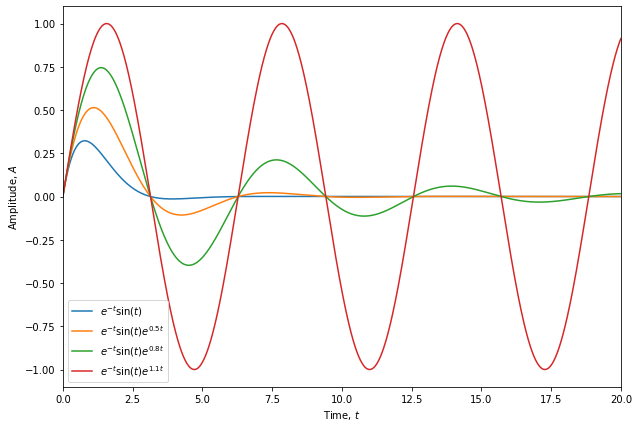

In [2]:
t = np.linspace(0, 20, 1001)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(t, np.sin(t)*np.exp(-t), label='$e^{-t} \sin(t) $')
ax.plot(t, np.sin(t)*np.exp(-t)*np.exp(0.5*t), label='$e^{-t} \sin(t) e^{0.5t} $')
ax.plot(t, np.sin(t)*np.exp(-t)*np.exp(0.8*t), label='$e^{-t} \sin(t) e^{0.8t} $')
ax.plot(t, np.sin(t)*np.exp(-t)*np.exp(1*t), label='$e^{-t} \sin(t) e^{1.1t} $')
ax.set_xlabel('Time, $t$')
ax.set_ylabel('Amplitude, $A$')
ax.set_xlim(0, 20)
#ax.set_ylim(-0.1, 1)
_ = ax.legend()

In [3]:
def fourier(func, wMin, wMax):
    t = np.linspace(0, 20, 1001)
    w = np.linspace(wMin, wMax, 501)
    CoM = np.array([])
    for i in range(len(w)):
        A = func*np.exp(-w[i]*t*1j)
        CoM = np.append(CoM, abs(sum(A)/len(A)))
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.plot(w, CoM)
    ax.set_xlabel('Angular Frequency, $\omega$')

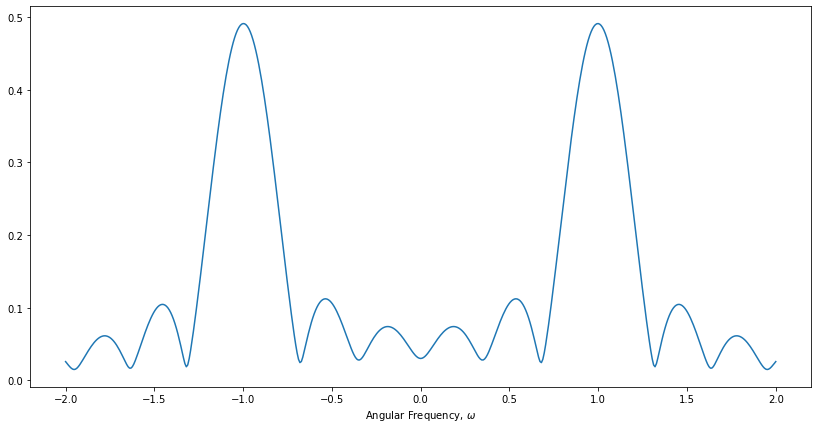

In [4]:
fourier(np.sin(t)*np.exp(-t)*np.exp(1*t), -2, 2)

In [5]:
def laplace(func, aMin, aMax, wMin, wMax):
    t = np.linspace(0, 20, 1001)
    w = np.linspace(wMin, wMax, 1001)
    a = np.linspace(aMin, aMax, 51)
    S = np.array([])
    A = np.array([])
    W = np.array([])
    for j in range(len(a)):
        A = np.append(A, np.repeat(a[j], len(w)))
        W = np.append(W, w)
        for i in range(len(w)):
            F = func*np.exp(-a[j]*t)*np.exp(-w[i]*t*1j)
            S = np.append(S, abs(sum(F)/len(F)))
    return A, W, S

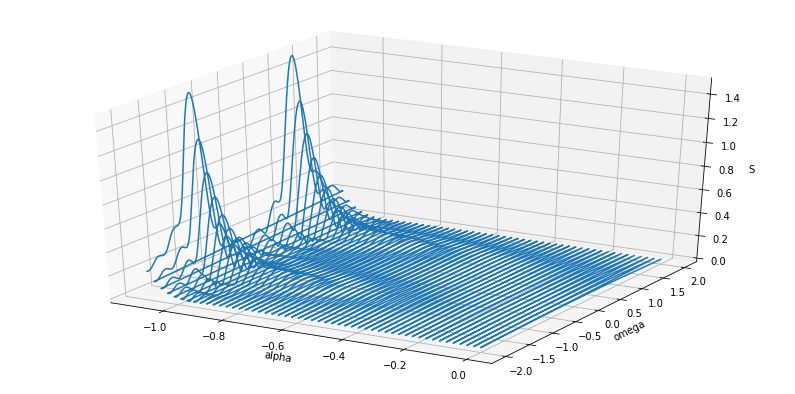

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(projection='3d')
X, Y, Z = laplace(np.sin(t)*np.exp(-t), -1.1, 0, -2, 2)
ax.plot(X, Y, Z)
ax.set_xlabel('alpha')
ax.set_ylabel('omega')
ax.set_zlabel('S')
_ = ax.set_zlim(0, 1.5)

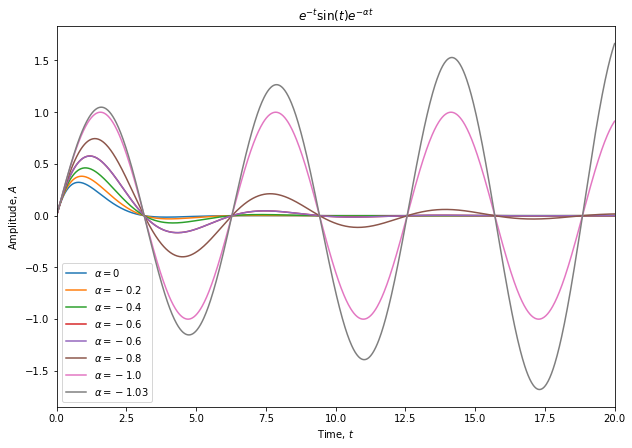

In [7]:
t = np.linspace(0, 20, 1001)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(t, np.sin(t)*np.exp(-t), label='$\\alpha = 0 $')
ax.plot(t, np.sin(t)*np.exp(-t)*np.exp(-(-0.2)*t), label='$ \\alpha = -0.2 $')
ax.plot(t, np.sin(t)*np.exp(-t)*np.exp(-(-0.4)*t), label='$ \\alpha = -0.4 $')
ax.plot(t, np.sin(t)*np.exp(-t)*np.exp(-(-0.6)*t), label='$ \\alpha = -0.6 $')
ax.plot(t, np.sin(t)*np.exp(-t)*np.exp(-(-0.6)*t), label='$ \\alpha = -0.6 $')
ax.plot(t, np.sin(t)*np.exp(-t)*np.exp(-(-0.8)*t), label='$ \\alpha = -0.8 $')
ax.plot(t, np.sin(t)*np.exp(-t)*np.exp(-(-1.0)*t), label='$ \\alpha = -1.0 $')
ax.plot(t, np.sin(t)*np.exp(-t)*np.exp(-(-1.03)*t), label='$ \\alpha = -1.03 $')
ax.set_xlabel('Time, $t$')
ax.set_ylabel('Amplitude, $A$')
ax.set_xlim(0, 20)
ax.set_title('$e^{-t} \sin(t) e^{- \\alpha t} $')
#ax.set_ylim(-0.1, 1)
_ = ax.legend()

In [8]:
t, s, x, y = sym.symbols('t s x y')
timeEq = sym.exp(-t) * sym.sin(t)
laplEq = sym.laplace_transform(timeEq, t, s)
laplEq[0]

1/((s + 1)**2 + 1)

In [9]:
laplEq[0].subs(s, x + y*sym.I)

1/((x + I*y + 1)**2 + 1)

In [10]:
S = sym.lambdify((x, y), laplEq[0].subs(s, x + y*sym.I))

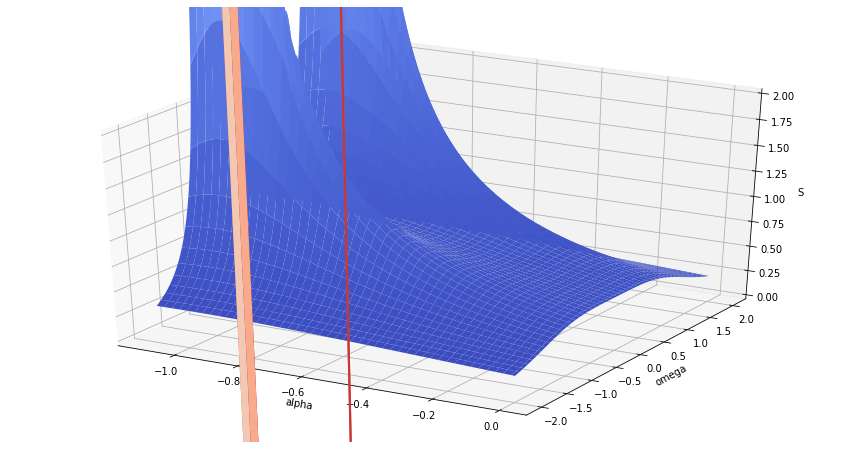

In [11]:
import matplotlib.cm as cm
A = np.linspace(-1.1, 0, 501)
W = np.linspace(-2, 2, 1001)
X, Y = np.meshgrid(A, W);
Z = abs(S(X, Y))
fig = plt.figure(figsize=(15,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, antialiased=True)
ax.set_zlim(0,2)
ax.set_xlabel('alpha')
ax.set_ylabel('omega')
_ = ax.set_zlabel('S')

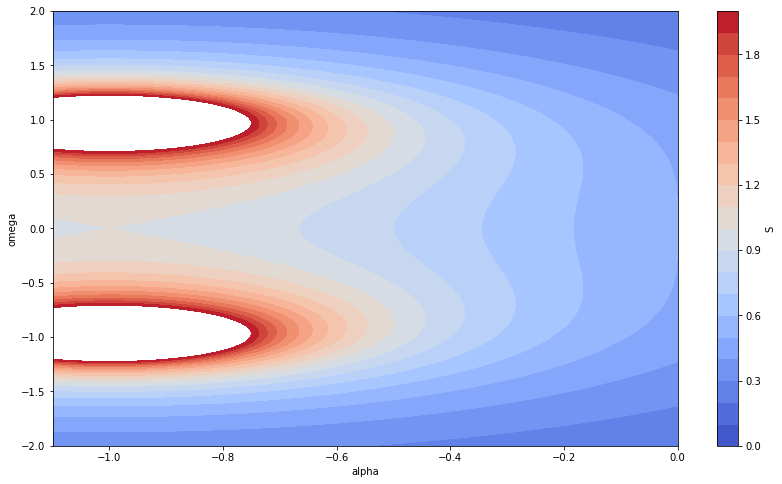

In [15]:
fig, ax = plt.subplots(figsize=(14, 8))
contour = ax.contourf(X, Y, Z, 
                      levels=np.linspace(0, 2, 21), #creates non-default levels
                      cmap=cm.coolwarm)
ax.set_xlabel('alpha')
ax.set_ylabel('omega')
_ = fig.colorbar(contour, label='S')